In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC #LinearSVC C Classfiler, SVG reGression

iris=load_iris()
X = iris["data"][:,(2,3)] #patal length, patal width
y = (iris["target"]==2).astype(np.float64) # iris-virginica
print(type(iris))
print(X[:5])
print(y[:5])

<class 'sklearn.utils.Bunch'>
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0. 0. 0. 0. 0.]


In [2]:
svm_clf = Pipeline((
                    ('scaler', StandardScaler()), # z- 평준화
                    ('linear_svc', LinearSVC(C=1, loss="hinge")),

))

In [3]:
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [5]:
svm_clf.score(X,y)

0.96

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC #LinearSVC C Classfiler, SVG reGression

iris=load_iris()
X = iris["data"] #patal length, patal width
y = (iris["target"]==2).astype(np.float64) # iris-virginica

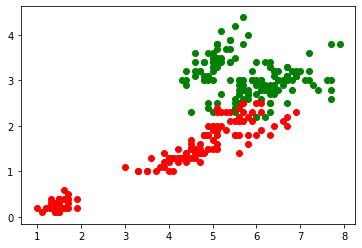

In [7]:
import matplotlib.pyplot as plt
import matplotlib
plt.scatter(X[:, 0], X[:, 1], c="g", marker="o", )#septal length, width
plt.scatter(X[:, 2], X[:, 3], c="r", marker="o", )#patal length, width
#plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',label="Luck")

In [16]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.5, random_state=42)
print(type(X), X.shape, X[:5]) #ndarray
#print(type(data=make_moons)) # tuple

<class 'numpy.ndarray'> (100, 2) [[ 1.83654512 -0.8085031 ]
 [ 0.25646214  0.96067201]
 [ 0.82126592 -0.16014553]
 [-1.41546245  0.19766067]
 [-0.2145851  -0.24684095]]


[[0.25646214 0.96067201]]
0.2564621367224206


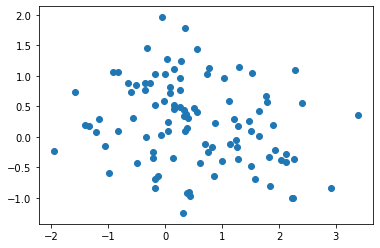

In [34]:
import matplotlib.pyplot as plt
import matplotlib
print(X[[1]])
print(X[1][0])
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
#다항식 전처리
polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        #("svm_clf", LinearSVC(C=10, loss="hinge")), # warning나타난다
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000, tol=0.001)),
))
polynomial_svm_clf.fit(X,y)

In [ ]:
#다항식 커널
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        #("svm_clf", LinearSVC(C=10, loss="hinge")), # warning나타난다
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
))
polynomial_svm_clf.fit(X,y)